In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
linkedin_df = pd.read_csv('linkedin-reviews.csv')
linkedin_df.head(10)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
5,This app is poor and bad. Linkedin app on my H...,1
6,Finally,5
7,Have been using DroidIn. Ability to move to SD...,4
8,Works fine on Samsung Captivate.,4
9,Clean design with limited features. How about ...,3


### Exploratory Data Analysis


##### Analyzing the distribution of Ratings

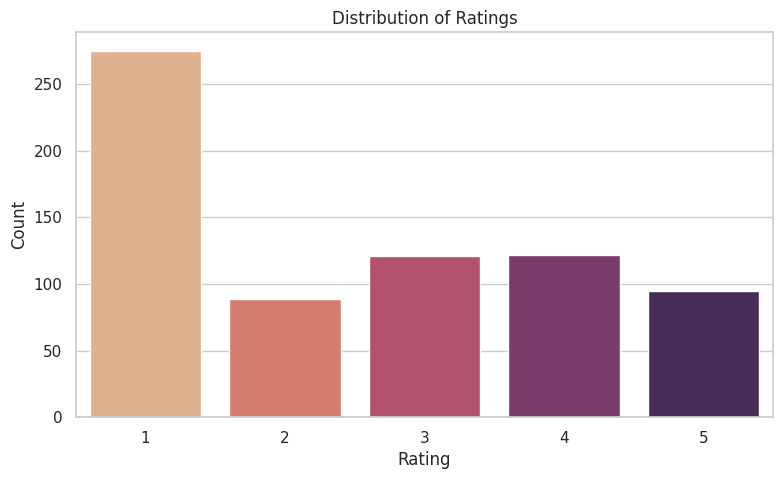

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))

sns.countplot(data=linkedin_df, x='Rating', hue='Rating', legend=False, palette='flare')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()